# AI-Driven Customer Insights and Revenue Optimization for Online Giftware Retailer

# Import Libraries 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")
%matplotlib inline

plt .rcParams["figure.figsize"]=[8,6]
sns.set_style("darkgrid")

df_data = pd.read_csv("C:/Users/30071747/Downloads/online_gift_ware_MI.csv")
df_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,01/12/2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12.0,01/12/2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,01/12/2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,01/12/2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,01/12/2009 07:45,1.25,13085.0,United Kingdom


## Number of Rows and Columns given in a dataset

In [4]:
print("Number of rows in dataset is: ", df_data.shape[0])
print("Number of columns in dataset is: ", df_data.shape[1])

Number of rows in dataset is:  1048575
Number of columns in dataset is:  8


## Data Information

In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1048575 non-null  object 
 1   StockCode    1048575 non-null  object 
 2   Description  1044191 non-null  object 
 3   Quantity     1048552 non-null  float64
 4   InvoiceDate  1048575 non-null  object 
 5   Price        1048562 non-null  float64
 6   Customer ID  811893 non-null   float64
 7   Country      1048567 non-null  object 
dtypes: float64(3), object(5)
memory usage: 64.0+ MB


## Customer Transaction by the country

In [6]:
customer_country=df_data[['Country','Customer ID']].drop_duplicates()
customer_country.groupby(['Country'])['Customer ID'].aggregate('count').reset_index().sort_values('Customer ID', ascending=False)

,Country,Customer ID
40,United Kingdom,5397
15,Germany,106
14,France,94
34,Spain,40
3,Belgium,29
30,Portugal,24
26,Netherlands,23
36,Switzerland,22
35,Sweden,19
20,Italy,17


In [7]:
#Cancelled Transactions 
cancelled = df_data[df_data['Invoice'].astype(str).str.contains('C')]
cancelled.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12.0,01/12/2009 10:33,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6.0,01/12/2009 10:33,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4.0,01/12/2009 10:33,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6.0,01/12/2009 10:33,NaN,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12.0,01/12/2009 10:33,NaN,16321.0,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12.0,01/12/2009 10:33,NaN,16321.0,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12.0,01/12/2009 10:33,NaN,16321.0,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24.0,01/12/2009 10:33,NaN,16321.0,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12.0,01/12/2009 10:33,NaN,16321.0,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3.0,01/12/2009 10:44,4.25,17592.0,United Kingdom


In [8]:
#Among cancelled transaction there are not any transactions with the positive  quantity
cancelled[cancelled['Quantity']>0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
76799,C496350,M,Manual,1.0,01/02/2010 08:24,373.57,NaN,United Kingdom


In [9]:
#Hovewer some transactions with negative quantity doesn't belong to cancelled
print("Number of cancelled transactions:", len(cancelled))
print("Total number of transaction with negative quantity:", df_data[df_data['Quantity'] <= 0 ]['Quantity'].count())

Number of cancelled transactions: 19261
Total number of transaction with negative quantity: 22697


In [10]:
#There are also transactions with zero price. Transactions with zero price doesn't bring usefull information to analysis, 
#moreover mainly there are not any description for such transactions. This transactions could be deleted.

df_data[df_data['Price'] == 0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96.0,01/12/2009 10:52,0.0,NaN,United Kingdom
283,489463,71477,short,-240.0,01/12/2009 10:52,0.0,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192.0,01/12/2009 10:53,0.0,NaN,United Kingdom
470,489521,21646,NaN,-50.0,01/12/2009 11:44,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44.0,01/12/2009 17:26,0.0,NaN,United Kingdom
3161,489659,21350,NaN,230.0,01/12/2009 17:39,0.0,NaN,United Kingdom
3162,489660,35956,lost,-1043.0,01/12/2009 17:43,0.0,NaN,United Kingdom
3168,489663,35605A,damages,-117.0,01/12/2009 18:02,0.0,NaN,United Kingdom
3731,489781,84292,NaN,17.0,02/12/2009 11:45,0.0,NaN,United Kingdom
4296,489806,18010,NaN,-770.0,02/12/2009 12:42,0.0,NaN,United Kingdom


In [11]:
#Also there are 2 transactions with negative price. 
#From the description we could see that these transactions were probably made as some correction, 
#so they also should be deleted.

df_data[df_data['Price'] < 0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1.0,29/04/2010 13:36,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1.0,19/07/2010 11:24,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1.0,20/10/2010 12:04,-38925.87,NaN,United Kingdom
825444,A563186,B,Adjust bad debt,1.0,12/08/2011 14:51,-11062.06,NaN,United Kingdom
825445,A563187,B,Adjust bad debt,1.0,12/08/2011 14:52,-11062.06,NaN,United Kingdom


In [12]:
#As it was mentioned before there are some negative quantity transactions wich are not cancelled, 
#hovewer all these transactions have 0 price.


d= df_data[~df_data['Invoice'].astype(str).str.contains('C')]  
print("Number of of transactions with negative quantity value among non cancelled transactions:" ,len(d[d['Quantity']<=0]))
print("Number of of transactions with zero price and negative quantity" ,len(d[(d['Quantity']<=0) & (d['Price'] == 0)]))

Number of of transactions with negative quantity value among non cancelled transactions: 3437
Number of of transactions with zero price and negative quantity 3437


In [13]:
#Percentage of transactions which will be deleted:
print("Percentage of cancelled transactions:" , round(len(cancelled)/len(df_data)*100, 2),"%")
print("Precentage of transactions with zero or negative price" ,round(len(df_data[df_data['Price']<=0])/len(df_data)*100, 2),"%")

Percentage of cancelled transactions: 1.84 %
Precentage of transactions with zero or negative price 0.59 %


In [14]:
data = df_data[(df_data['Price'] > 0) & (df_data['Quantity']>0)]

In [15]:
#All rows with missing descriptions are gone after deleting problematic transactiones.
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1048575 non-null  object 
 1   StockCode    1048575 non-null  object 
 2   Description  1044191 non-null  object 
 3   Quantity     1048552 non-null  float64
 4   InvoiceDate  1048575 non-null  object 
 5   Price        1048562 non-null  float64
 6   Customer ID  811893 non-null   float64
 7   Country      1048567 non-null  object 
dtypes: float64(3), object(5)
memory usage: 64.0+ MB


In [16]:
#Check and delete the duplicate transactions
print("Number of duplicated transactions:", len(data[data.duplicated()]))

Number of duplicated transactions: 33572


In [17]:
data.drop_duplicates(inplace=True)

In [18]:
data=data.dropna(subset=['Customer ID'])

## Stock Code

In [19]:
#Stock Code should be numerical value, 
#hovewer there are some transactions which contains only multiple letters/words, this transactions will also be dropped

data = data.loc[data['StockCode'].astype(str).str[0:4].str.isdigit()]

In [20]:
len(data['StockCode'].unique().tolist())

4618

## Dates

In [21]:
# Adding features as year, months, month_year, day of week, hour

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_data=pd.read_csv("C:/Users/30071747/Downloads/online_gift_ware_MI.csv")
df_data.dropna(inplace=True)
df_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,01/12/2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12.0,01/12/2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,01/12/2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,01/12/2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,01/12/2009 07:45,1.25,13085.0,United Kingdom


In [22]:
df_data['InvoiceDate']=pd.to_datetime(df_data['InvoiceDate'])

In [23]:
df_data['month']=df_data['InvoiceDate'].dt.month
df_data[['InvoiceDate','month']].head(10)

,InvoiceDate,month
0,2009-01-12 07:45:00,1
1,2009-01-12 07:45:00,1
2,2009-01-12 07:45:00,1
3,2009-01-12 07:45:00,1
4,2009-01-12 07:45:00,1
5,2009-01-12 07:45:00,1
6,2009-01-12 07:45:00,1
7,2009-01-12 07:45:00,1
8,2009-01-12 07:46:00,1
13,2009-01-12 09:06:00,1


In [24]:
df_data['year']=df_data['InvoiceDate'].dt.year
df_data[['InvoiceDate','year']].head(10)

,InvoiceDate,year
0,2009-01-12 07:45:00,2009
1,2009-01-12 07:45:00,2009
2,2009-01-12 07:45:00,2009
3,2009-01-12 07:45:00,2009
4,2009-01-12 07:45:00,2009
5,2009-01-12 07:45:00,2009
6,2009-01-12 07:45:00,2009
7,2009-01-12 07:45:00,2009
8,2009-01-12 07:46:00,2009
13,2009-01-12 09:06:00,2009


In [25]:
df_data['day_month']=df_data['InvoiceDate'].dt.day
df_data[['InvoiceDate','day_month']].head(10)

,InvoiceDate,day_month
0,2009-01-12 07:45:00,12
1,2009-01-12 07:45:00,12
2,2009-01-12 07:45:00,12
3,2009-01-12 07:45:00,12
4,2009-01-12 07:45:00,12
5,2009-01-12 07:45:00,12
6,2009-01-12 07:45:00,12
7,2009-01-12 07:45:00,12
8,2009-01-12 07:46:00,12
13,2009-01-12 09:06:00,12


In [26]:
df_data['day_week']=df_data['InvoiceDate'].dt.day_name()
df_data[['InvoiceDate','day_week']].head()

,InvoiceDate,day_week
0,2009-01-12 07:45:00,Monday
1,2009-01-12 07:45:00,Monday
2,2009-01-12 07:45:00,Monday
3,2009-01-12 07:45:00,Monday
4,2009-01-12 07:45:00,Monday


In [27]:
df_data['month_year'] = pd.to_datetime(df_data[['year', 'month']].assign(Day=1))

In [28]:
diff=df_data['InvoiceDate'].iloc[0] - df_data['InvoiceDate'].iloc[6]
print(df_data["InvoiceDate"].iloc[0])
print(df_data["InvoiceDate"].iloc[6])
print(diff)

2009-01-12 07:45:00
2009-01-12 07:45:00
0 days 00:00:00


In [29]:
df_data['InvoiceDate']=pd.to_datetime(df_data['InvoiceDate'])

In [30]:
df_data['hour']=df_data['InvoiceDate'].dt.hour
df_data['min']=df_data['InvoiceDate'].dt.minute
df_data['sec']=df_data['InvoiceDate'].dt.second

df_data.shift(-30).head(25)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,month,year,day_month,day_week,month_year,hour,min,sec
0,489437,21360,JOY LARGE WOOD LETTERS,1.0,2009-01-12 09:08:00,9.95,15362.0,United Kingdom,1.0,2009.0,12.0,Monday,2009-01-01,9.0,8.0,0.0
1,489437,21351,CINAMMON & ORANGE WREATH,2.0,2009-01-12 09:08:00,6.75,15362.0,United Kingdom,1.0,2009.0,12.0,Monday,2009-01-01,9.0,8.0,0.0
2,489437,21352,EUCALYPTUS & PINECONE WREATH,2.0,2009-01-12 09:08:00,6.75,15362.0,United Kingdom,1.0,2009.0,12.0,Monday,2009-01-01,9.0,8.0,0.0
3,489437,35400,WOODEN BOX ADVENT CALENDAR,2.0,2009-01-12 09:08:00,8.95,15362.0,United Kingdom,1.0,2009.0,12.0,Monday,2009-01-01,9.0,8.0,0.0
4,489437,20695,FLORAL BLUE MONSTER,3.0,2009-01-12 09:08:00,4.25,15362.0,United Kingdom,1.0,2009.0,12.0,Monday,2009-01-01,9.0,8.0,0.0
5,489437,37370,RETRO COFFEE MUGS ASSORTED,12.0,2009-01-12 09:08:00,1.25,15362.0,United Kingdom,1.0,2009.0,12.0,Monday,2009-01-01,9.0,8.0,0.0
6,489437,10002,INFLATABLE POLITICAL GLOBE,12.0,2009-01-12 09:08:00,0.85,15362.0,United Kingdom,1.0,2009.0,12.0,Monday,2009-01-01,9.0,8.0,0.0
7,489437,84507B,STRIPES DESIGN MONKEY DOLL,6.0,2009-01-12 09:08:00,2.55,15362.0,United Kingdom,1.0,2009.0,12.0,Monday,2009-01-01,9.0,8.0,0.0
8,489437,20703,BLUE PADDED SOFT MOBILE,3.0,2009-01-12 09:08:00,4.25,15362.0,United Kingdom,1.0,2009.0,12.0,Monday,2009-01-01,9.0,8.0,0.0
13,489437,21987,PACK OF 6 SKULL PAPER CUPS,12.0,2009-01-12 09:08:00,0.65,15362.0,United Kingdom,1.0,2009.0,12.0,Monday,2009-01-01,9.0,8.0,0.0


In [31]:
df_data['revenue'] = df_data['Price'] * df_data['Quantity']

In [32]:
plot = pd.DataFrame(df_data.groupby(['month_year'])['Invoice'].count()).reset_index()
plot2 = pd.DataFrame(df_data.groupby(['day_week'])['Invoice'].count())
plot3 = pd.DataFrame(df_data.groupby(['hour'])['Invoice'].count()).reset_index()
plot4 = pd.DataFrame(df_data.groupby(['month_year'])['revenue'].mean()).reset_index()
plot5 = pd.DataFrame(df_data.groupby(['month_year'])['revenue'].sum()).reset_index()

In [33]:
plot2 = plot2.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']).reset_index()

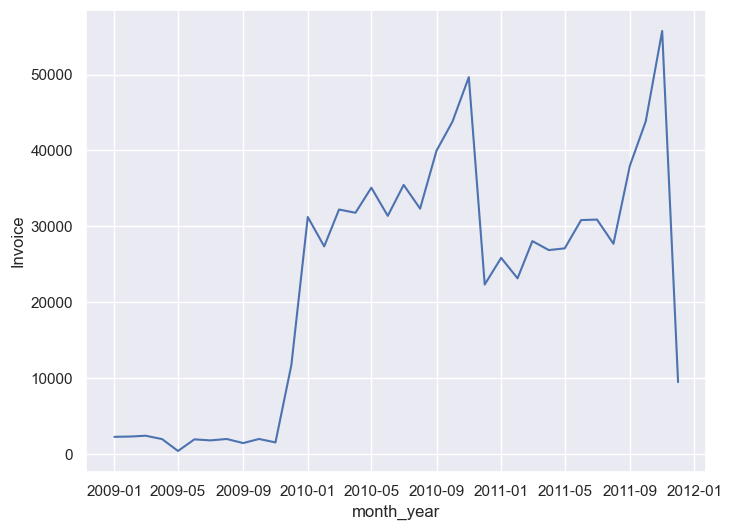

In [34]:
#How many orders per month
ax = sns.lineplot(x="month_year", y="Invoice", data = plot)

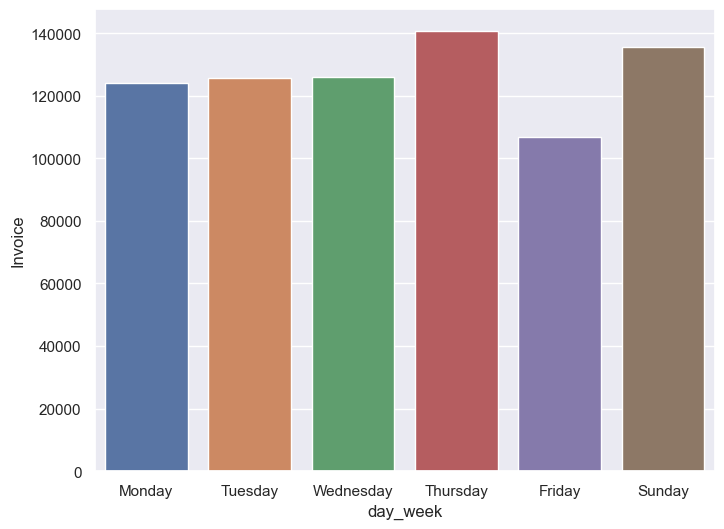

In [35]:
#How many orders per day
ax = sns.barplot(x="day_week", y="Invoice", data = plot2)

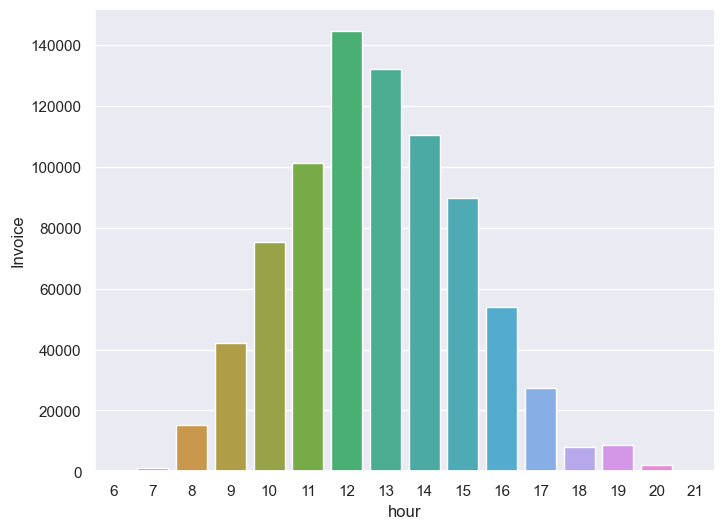

In [36]:
#How many orders per hour?
ax = sns.barplot(x="hour", y="Invoice", data = plot3)

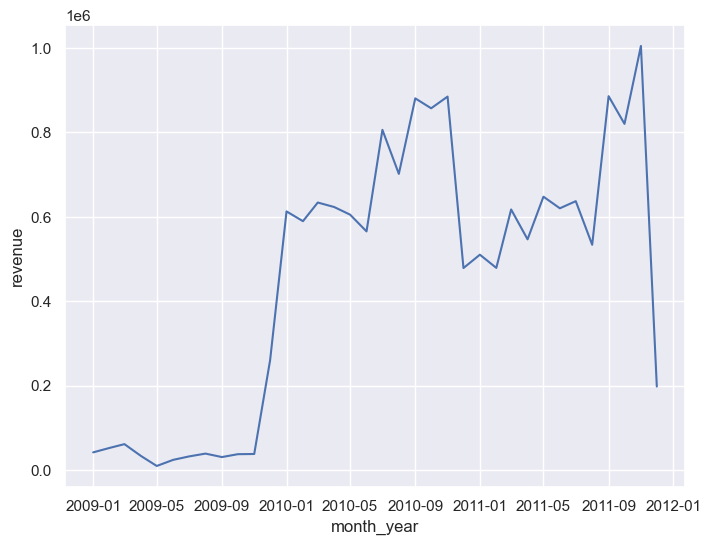

In [37]:
#Which month brings the highest revenue?
ax = sns.lineplot(x = 'month_year', y='revenue', data = plot5)

## Price 

In [39]:
#From the descriptive statistics for price variable, we could see that most ot the sold products are quite cheap.
#Probably retail sells some small items, as office supplies, small decorations etc.

pd.DataFrame(df_data['Price'].describe()).T

,count,mean,std,min,25%,50%,75%,max
Price,811841.0,3.68998,70.745933,0.0,1.25,1.95,3.75,38970.0


In [40]:
#Description of products, which cost more than 50 (Assumption: same currency for retails in different countries.)
df_data[df_data['Price']>50]['Description'].unique().tolist()


['POSTAGE',
 'VINTAGE POST OFFICE CABINET',
 'Manual',
 'Discount',
 'BLUE KASHMIRI OCCASIONAL TABLE',
 'Adjustment by john on 26/01/2010 16',
 'Adjustment by john on 26/01/2010 17',
 'SET/3 COLOUR PAINTED KASHMIRI STOOL',
 'BLUE PAINTED KASHMIRI TABLE ',
 'PINK PAINTED KASHMIRI TABLE',
 'BLUE KASHMIRI COFFEE TABLE ',
 'PINK KASHMIRI COFFEE TABLE ',
 'FRENCH STYLE WALL DRESSER',
 'ANT WHITE SWEETHEART TABLE W 3 DRAW',
 'DECORATIVE HANGING SHELVING UNIT',
 'GREEN KASHMIRI OCCASIONAL TABLE',
 'Adjustment by Peter on 24/05/2010 1',
 'Adjustment by Peter on Jun 25 2010 ',
 'VINTAGE BLUE KITCHEN CABINET',
 'VINTAGE RED KITCHEN CABINET',
 'CARRIAGE',
 'GIANT SEVENTEEN DRAWER SIDEBOARD',
 'REGENCY MIRROR WITH SHUTTERS',
 'PINK KASHMIRI OCCASIONAL TABLE',
 'CHEST NATURAL WOOD 20 DRAWERS',
 'RUSTIC  SEVENTEEN DRAWER SIDEBOARD',
 'SCHOOL DESK AND CHAIR ',
 'LOVE SEAT ANTIQUE WHITE METAL',
 'PICNIC BASKET WICKER 60 PIECES',
 'BROCADE RING PURSE ',
 'CRUK Commission',
 'DOTCOM POSTAGE']

## Price distribution of Expensive Goods

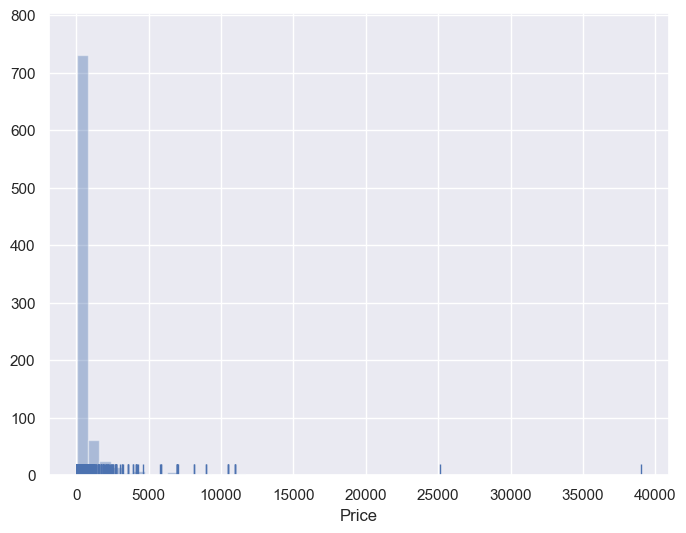

In [42]:
sns.distplot(df_data[df_data['Price']>50]['Price'], kde=False, rug=True);

## Transaction by the country

In [43]:
customer_country=df_data[['Country','Customer ID']].drop_duplicates()
customer_country.groupby(['Country'])['Customer ID'].aggregate('count').reset_index().sort_values('Customer ID', ascending=False)

,Country,Customer ID
38,United Kingdom,5397
14,Germany,106
13,France,94
32,Spain,40
3,Belgium,29
28,Portugal,24
24,Netherlands,23
34,Switzerland,22
33,Sweden,19
18,Italy,17


In [44]:
print("Transactions were made in", len(data['Country'].unique().tolist()), "different countries")

Transactions were made in 42 different countries


In [45]:
print("Number of transactions where country is unspecified:", len(df_data[df_data['Country']=='Unspecified']))

Number of transactions where country is unspecified: 524


In [46]:
plot6 = pd.DataFrame(df_data.groupby(['Country'])['revenue'].sum()).reset_index()
plot6 = plot6.sort_values(['revenue']).reset_index(drop=True)
plot7 = pd.DataFrame(df_data.groupby(['Country'])['revenue'].count()).reset_index()
plot7 = plot7.sort_values(['revenue']).reset_index(drop=True)

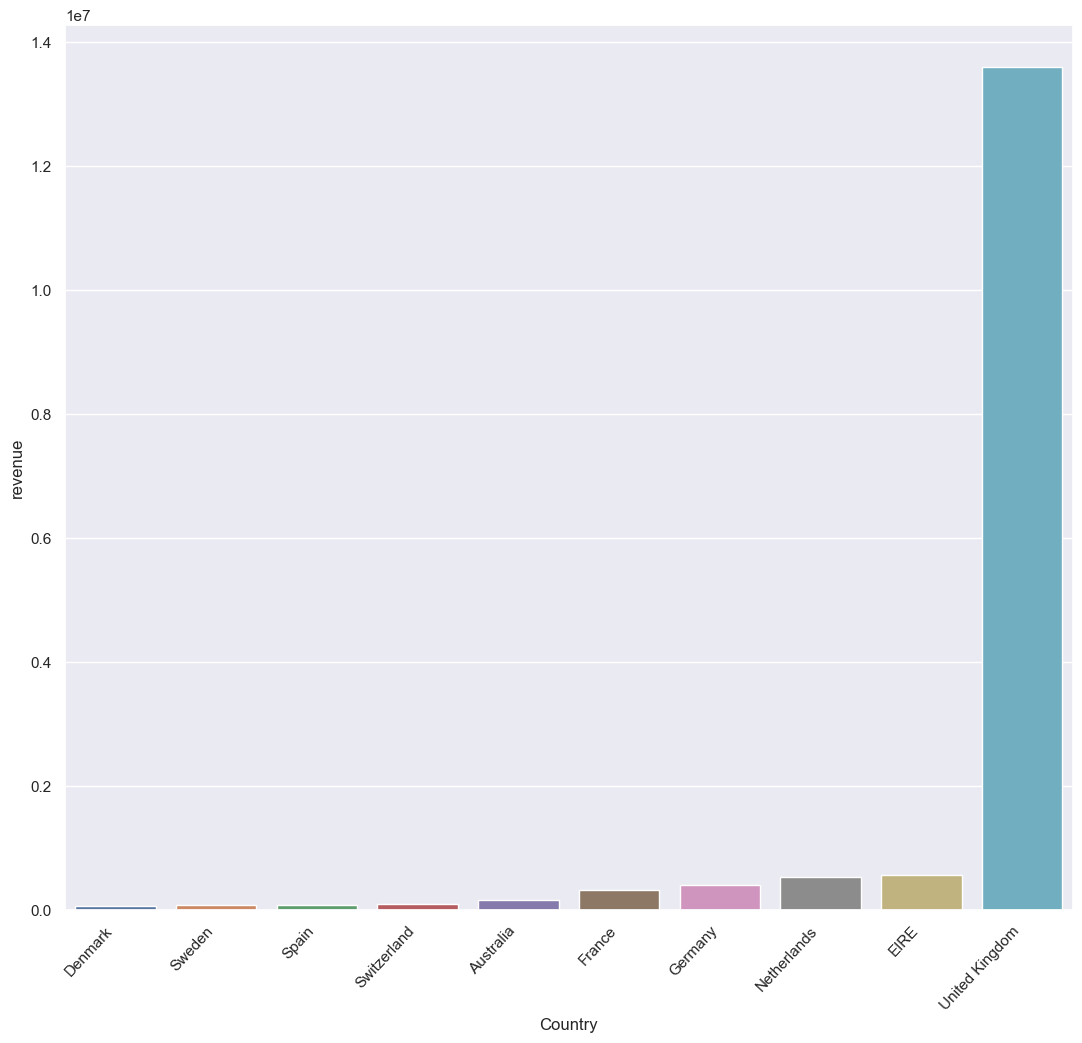

In [47]:
%matplotlib inline
fig, ax = plt.subplots()
fig.set_size_inches(13, 11.5)
ax=sns.barplot(x='Country', y='revenue',data=plot6.tail(10),estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

## Countries by Number of Orders

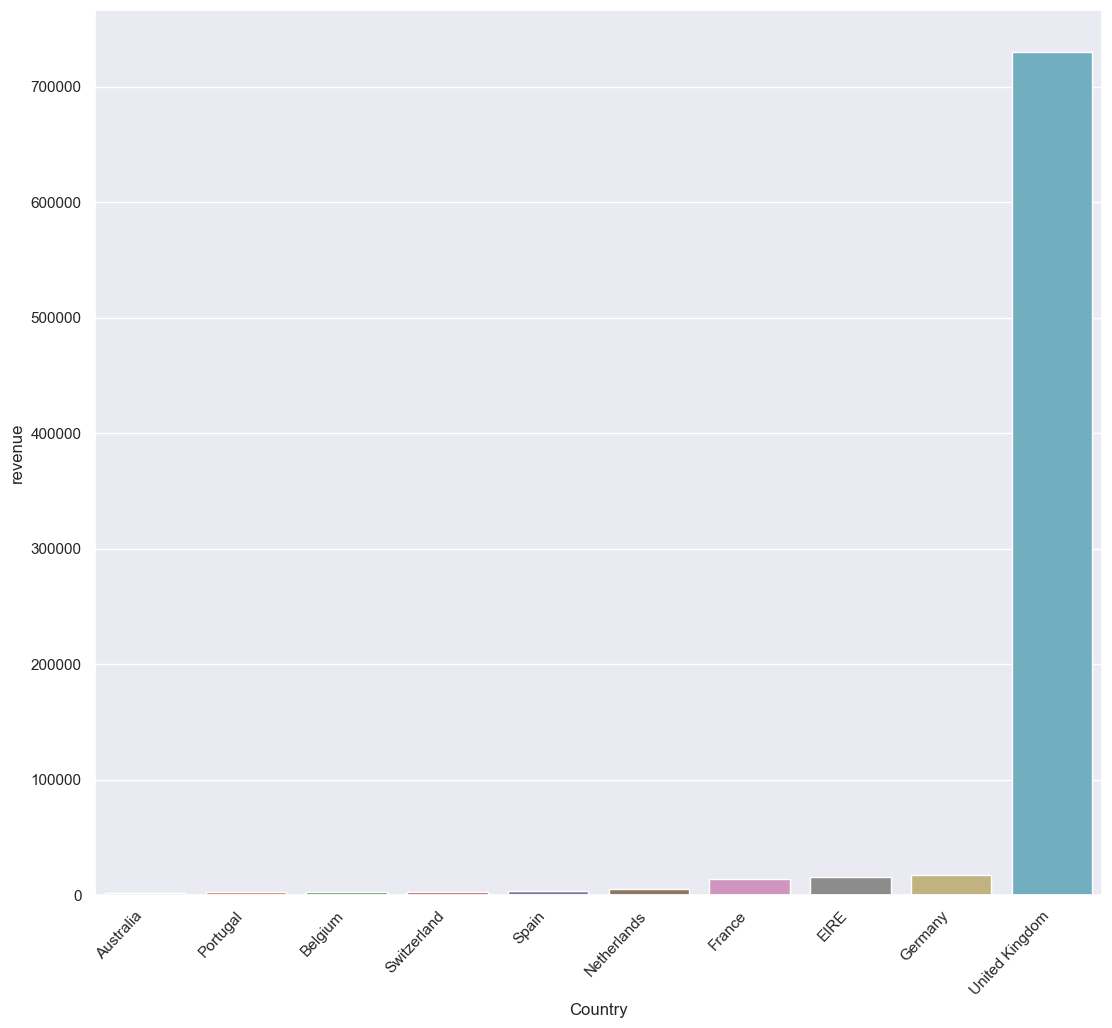

In [48]:
#The biggest number of orders are made in United Kingdom, which is expected, because the store is UK-based.
%matplotlib inline
fig, ax = plt.subplots()
fig.set_size_inches(13, 11.5)
ax=sns.barplot(x='Country', y='revenue',data=plot7.tail(10),estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

## Top Customers

## How often did the customer purchase the item

In [49]:
df_data['freq'] = df_data.groupby('Customer ID')['Customer ID'].transform('count')

In [52]:
customer  = pd.DataFrame(df_data.groupby(['Customer ID'])['revenue'].sum().sort_values(ascending=False)).reset_index().head(10)

In [53]:
customer['Customer ID'].tolist()

[18102.0,
 14646.0,
 14156.0,
 14911.0,
 17450.0,
 13694.0,
 17511.0,
 12415.0,
 16684.0,
 15061.0]

In [54]:
top_customer = df_data[df_data['Customer ID'].isin(customer['Customer ID'].tolist())][['Customer ID', 'Country', 'revenue', 'Quantity', 'freq']]

In [55]:
#Countries where the top customers resids
top_customer['Country'].unique().tolist()

['United Kingdom', 'EIRE', 'Netherlands', 'Australia']

## Revenue, Frequency, Monetary Calculations

In [56]:
df_data = df_data[df_data['Country'] == "United Kingdom"]
df_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,month,year,day_month,day_week,month_year,hour,min,sec,revenue,freq
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-01-12 07:45:00,6.95,13085.0,United Kingdom,1,2009,12,Monday,2009-01-01,7,45,0,83.4,89
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,1,2009,12,Monday,2009-01-01,7,45,0,81.0,89
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,1,2009,12,Monday,2009-01-01,7,45,0,81.0,89
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-01-12 07:45:00,2.10,13085.0,United Kingdom,1,2009,12,Monday,2009-01-01,7,45,0,100.8,89
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-01-12 07:45:00,1.25,13085.0,United Kingdom,1,2009,12,Monday,2009-01-01,7,45,0,30.0,89


In [57]:
print(df_data['InvoiceDate'].min())
print(df_data['InvoiceDate'].max())

2009-01-12 07:45:00
2011-12-10 17:19:00


In [58]:
import datetime as dt
presence = dt.datetime(2011,12,10)
df_data['InvoiceDate'] = pd.to_datetime(df_data['InvoiceDate'])

In [59]:
rfm = df_data.groupby('Customer ID').agg({'InvoiceDate': lambda x: (presence - x.max()).days, 'Invoice': lambda x: len(x), 'revenue': lambda x: x.sum()})
rfm['InvoiceDate'] = rfm['InvoiceDate'].astype(int)
rfm.rename(columns={'InvoiceDate': 'recency', 
                         'Invoice': 'frequency', 
                         'revenue': 'monetary_value'}, inplace=True)

In [61]:
rfm.head()

,recency,frequency,monetary_value
Customer ID,,,
12346.0,325,48,-64.68
12608.0,404,16,415.79
12745.0,427,22,723.85
12746.0,527,20,230.85
12747.0,22,258,8726.09


In [62]:
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [63]:
rfm_segments= rfm

In [64]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [65]:
rfm_segments['R_Quartile'] = rfm_segments['recency'].apply(RClass, args=('recency',quantiles,))
rfm_segments['F_Quartile'] = rfm_segments['frequency'].apply(FMClass, args=('frequency',quantiles,))
rfm_segments['M_Quartile'] = rfm_segments['monetary_value'].apply(FMClass, args=('monetary_value',quantiles,))

In [66]:
rfm_segments['RFMClass'] = rfm_segments.R_Quartile.map(str) \
                            + rfm_segments.F_Quartile.map(str) \
                            + rfm_segments.M_Quartile.map(str)

In [67]:
rfm_segments.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
Customer ID,,,,,,,
12346.0,325,48,-64.68,3,3,4,334
12608.0,404,16,415.79,4,4,3,443
12745.0,427,22,723.85,4,3,3,433
12746.0,527,20,230.85,4,4,4,444
12747.0,22,258,8726.09,1,1,1,111


In [68]:
rfm_segments['RFMClass'].unique()

array(['334', '443', '433', '444', '111', '211', '244', '232', '241',
       '233', '343', '231', '333', '311', '323', '223', '122', '324',
       '344', '423', '221', '434', '422', '322', '243', '332', '342',
       '132', '142', '133', '144', '222', '123', '234', '121', '432',
       '412', '321', '112', '312', '411', '242', '143', '124', '131',
       '341', '134', '421', '212', '424', '441', '113', '442', '224',
       '431', '331', '313', '413', '213', '141', '114'], dtype=object)

In [69]:
rfm_segments.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
Customer ID,,,,,,,
12346.0,325,48,-64.68,3,3,4,334
12608.0,404,16,415.79,4,4,3,443
12745.0,427,22,723.85,4,3,3,433
12746.0,527,20,230.85,4,4,4,444
12747.0,22,258,8726.09,1,1,1,111


In [71]:
print("Champions: ",len(rfm_segments[rfm_segments['RFMClass']=='111']), "(", round(len(rfm_segments[rfm_segments['RFMClass']=='111'])/len(rfm_segments)*100,2), "%)") 
print('Loyal Customers: ',len(rfm_segments[rfm_segments['F_Quartile']==1]), "(", round(len(rfm_segments[rfm_segments['F_Quartile']==1])/len(rfm_segments)*100,2), "%)")
print("Big Spenders: ",len(rfm_segments[rfm_segments['M_Quartile']==1]), "(", round(len(rfm_segments[rfm_segments['M_Quartile']==1])/len(rfm_segments)*100,2), "%)")
print('About to Sleep: ', len(rfm_segments[rfm_segments['RFMClass']=='322']), "(", round(len(rfm_segments[rfm_segments['RFMClass']=='322'])/len(rfm_segments)*100,2), "%)")
print('Lost Customers: ',len(rfm_segments[rfm_segments['RFMClass']=='444']), "(", round(len(rfm_segments[rfm_segments['RFMClass']=='444'])/len(rfm_segments)*100,2), "%)")

Champions:  574 ( 10.64 %)
Loyal Customers:  1346 ( 24.94 %)
Big Spenders:  1349 ( 25.0 %)
About to Sleep:  212 ( 3.93 %)
Lost Customers:  519 ( 9.62 %)


In [72]:
#We will now create a new Dataframe which will have each unique customer will total amount they have spent.
#In this way we can cluster them according to Amount spent.
each_customer=df_data.groupby('Customer ID')['revenue'].sum()

In [73]:
each_customer=each_customer.reset_index()

In [74]:
each_customer

,Customer ID,revenue
0,12346.0,-64.68
1,12608.0,415.79
2,12745.0,723.85
3,12746.0,230.85
4,12747.0,8726.09
...,...,...
5392,18283.0,2528.65
5393,18284.0,436.68
5394,18285.0,427.00
5395,18286.0,1188.43


In [75]:
#We are take .sum() to add up all the amounts and get a total for each CustomerID.

#We can also find out how many times a Customer has visited the store by the column Invoice.

each_customer_freq=df_data.groupby('Customer ID')['Invoice'].count()

In [76]:
each_customer_freq=each_customer_freq.reset_index()

In [77]:
each_customer_freq

,Customer ID,Invoice
0,12346.0,48
1,12608.0,16
2,12745.0,22
3,12746.0,20
4,12747.0,258
...,...,...
5392,18283.0,936
5393,18284.0,29
5394,18285.0,12
5395,18286.0,70


In [78]:
#Here we have taken ‘Count’ of each invoices for each customer so that we can get a total number of invoices for each customer.

#Lets merge the two dataframes

customer_details=pd.merge(each_customer_freq,each_customer,on='Customer ID')

In [79]:
customer_details

,Customer ID,Invoice,revenue
0,12346.0,48,-64.68
1,12608.0,16,415.79
2,12745.0,22,723.85
3,12746.0,20,230.85
4,12747.0,258,8726.09
...,...,...,...
5392,18283.0,936,2528.65
5393,18284.0,29,436.68
5394,18285.0,12,427.00
5395,18286.0,70,1188.43


In [80]:
#Now as we need the exact no of days a customer has been last active
#we will use the InvoiceDate column to find out the most recent date from
#the InvoiceDate column and then subtract the Maximum date with the Invoice date for each customer 
#which will give us no. of days the customer was last active.

max_date=max(df_data['InvoiceDate'])

In [81]:
max_date

Timestamp('2011-12-10 17:19:00')

In [82]:
df_data['recency']=max_date-df_data['InvoiceDate']

In [83]:
df_data.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,month,year,day_month,day_week,month_year,hour,min,sec,revenue,freq,recency
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-01-12 07:45:00,6.95,13085.0,United Kingdom,1,2009,12,Monday,2009-01-01,7,45,0,83.4,89,1062 days 09:34:00
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,1,2009,12,Monday,2009-01-01,7,45,0,81.0,89,1062 days 09:34:00
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,1,2009,12,Monday,2009-01-01,7,45,0,81.0,89,1062 days 09:34:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-01-12 07:45:00,2.10,13085.0,United Kingdom,1,2009,12,Monday,2009-01-01,7,45,0,100.8,89,1062 days 09:34:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-01-12 07:45:00,1.25,13085.0,United Kingdom,1,2009,12,Monday,2009-01-01,7,45,0,30.0,89,1062 days 09:34:00
5,489434,22064,PINK DOUGHNUT TRINKET POT,24.0,2009-01-12 07:45:00,1.65,13085.0,United Kingdom,1,2009,12,Monday,2009-01-01,7,45,0,39.6,89,1062 days 09:34:00
6,489434,21871,SAVE THE PLANET MUG,24.0,2009-01-12 07:45:00,1.25,13085.0,United Kingdom,1,2009,12,Monday,2009-01-01,7,45,0,30.0,89,1062 days 09:34:00
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10.0,2009-01-12 07:45:00,5.95,13085.0,United Kingdom,1,2009,12,Monday,2009-01-01,7,45,0,59.5,89,1062 days 09:34:00
8,489435,22350,CAT BOWL,12.0,2009-01-12 07:46:00,2.55,13085.0,United Kingdom,1,2009,12,Monday,2009-01-01,7,46,0,30.6,89,1062 days 09:33:00
13,489436,21755,LOVE BUILDING BLOCK WORD,18.0,2009-01-12 09:06:00,5.45,13078.0,United Kingdom,1,2009,12,Monday,2009-01-01,9,6,0,98.1,842,1062 days 08:13:00


In [84]:
#Now we can groupby each customer and take out the .min() from the recency column 
#to get the days when the customer was last seen.

dates=df_data.groupby('Customer ID')['recency'].min()

In [85]:
dates=dates.reset_index()

In [86]:
dates=dates.reset_index()

In [87]:
dates['recency']=dates['recency'].dt.days

In [88]:
dates

,index,Customer ID,recency
0,0,12346.0,326
1,1,12608.0,405
2,2,12745.0,428
3,3,12746.0,528
4,4,12747.0,23
...,...,...,...
5392,5392,18283.0,10
5393,5393,18284.0,548
5394,5394,18285.0,661
5395,5395,18286.0,477


In [89]:
#Above we have used dt.days of the datetime library to get only the days and remove the time.

#Now lets merge this Dataframe with the earlier ‘Customer_details’ Dataframe.

customer_details

,Customer ID,Invoice,revenue
0,12346.0,48,-64.68
1,12608.0,16,415.79
2,12745.0,22,723.85
3,12746.0,20,230.85
4,12747.0,258,8726.09
...,...,...,...
5392,18283.0,936,2528.65
5393,18284.0,29,436.68
5394,18285.0,12,427.00
5395,18286.0,70,1188.43


In [90]:
#Now the ‘revenue’ column has lots of outliers which we need to remove in order to form good clusters.

z=customer_details.revenue.quantile(0.05)

In [91]:
y=customer_details.revenue.quantile(0.95)

In [92]:
iqr=y-z

In [93]:
customer_details=customer_details[(customer_details['revenue']>=z-1.5*iqr) &(customer_details['revenue']<=y+1.5*iqr)]

In [94]:
customer_details

,Customer ID,Invoice,revenue
0,12346.0,48,-64.68
1,12608.0,16,415.79
2,12745.0,22,723.85
3,12746.0,20,230.85
4,12747.0,258,8726.09
...,...,...,...
5392,18283.0,936,2528.65
5393,18284.0,29,436.68
5394,18285.0,12,427.00
5395,18286.0,70,1188.43


In [95]:
#Here we have used the quartile values to remove the outliers from the Amount column ,
#anything which is below ‘z-1.5*iqr’ and anything above ‘y+1.5*iqr’ will be removed.This is the standard way to remove outliers.
#Repeating these steps for other features.

q1=customer_details.Invoice.quantile(0.05)
q3=customer_details.Invoice.quantile(0.95)
iqr=q3-q1
customer_details=customer_details[(customer_details['Invoice']>=q1-1.5*iqr) & (customer_details['Invoice']<=q3+1.5*iqr)]

In [96]:
customer_details

,Customer ID,Invoice,revenue
0,12346.0,48,-64.68
1,12608.0,16,415.79
2,12745.0,22,723.85
3,12746.0,20,230.85
4,12747.0,258,8726.09
...,...,...,...
5392,18283.0,936,2528.65
5393,18284.0,29,436.68
5394,18285.0,12,427.00
5395,18286.0,70,1188.43


## Trends

In [97]:
import numpy as np
import pandas as pd
%matplotlib inline

df = pd.read_csv('C:/Users/30071747/Downloads/online_gift_ware_MI.csv',index_col=0,parse_dates=False)
df.head()

,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
Invoice,,,,,,,
489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,01/12/2009 07:45,6.95,13085.0,United Kingdom
489434,79323P,PINK CHERRY LIGHTS,12.0,01/12/2009 07:45,6.75,13085.0,United Kingdom
489434,79323W,WHITE CHERRY LIGHTS,12.0,01/12/2009 07:45,6.75,13085.0,United Kingdom
489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,01/12/2009 07:45,2.10,13085.0,United Kingdom
489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,01/12/2009 07:45,1.25,13085.0,United Kingdom


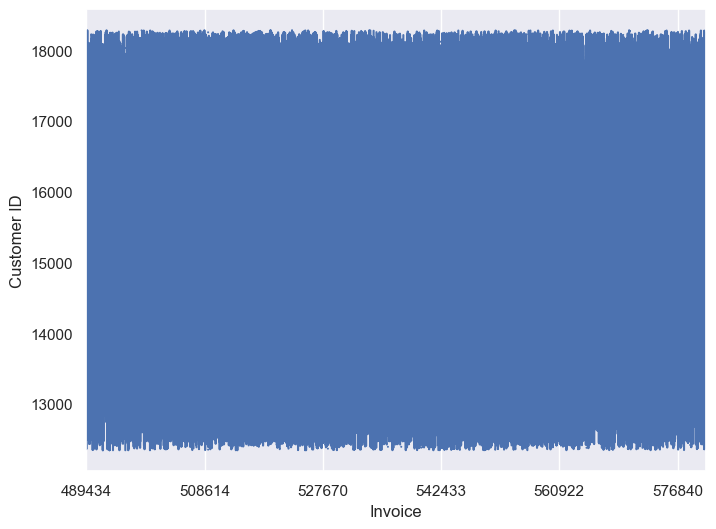

In [98]:
ax = df['Customer ID'].plot(figsize=(8,6))
ax.autoscale(axis='x',tight=True)
ax.set(ylabel='Customer ID');

In [99]:
from statsmodels.tsa.filters.hp_filter import hpfilter

#Tuple unpacking
mean_cycle,mean_trend = hpfilter(df['Customer ID'],lamb=1600)

In [100]:
mean_trend

Invoice
489434   NaN
489434   NaN
489434   NaN
489434   NaN
489434   NaN
          ..
580501   NaN
580501   NaN
580502   NaN
580502   NaN
580502   NaN
Name: Customer ID_trend, Length: 1048575, dtype: float64

In [101]:
mean_cycle

Invoice
489434   NaN
489434   NaN
489434   NaN
489434   NaN
489434   NaN
          ..
580501   NaN
580501   NaN
580502   NaN
580502   NaN
580502   NaN
Name: Customer ID_cycle, Length: 1048575, dtype: float64

In [102]:
df['trend']=mean_trend

In [103]:
df.head()

,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,trend
Invoice,,,,,,,,
489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,01/12/2009 07:45,6.95,13085.0,United Kingdom,NaN
489434,79323P,PINK CHERRY LIGHTS,12.0,01/12/2009 07:45,6.75,13085.0,United Kingdom,NaN
489434,79323W,WHITE CHERRY LIGHTS,12.0,01/12/2009 07:45,6.75,13085.0,United Kingdom,NaN
489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,01/12/2009 07:45,2.10,13085.0,United Kingdom,NaN
489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,01/12/2009 07:45,1.25,13085.0,United Kingdom,NaN


In [104]:
type(mean_cycle)

pandas.core.series.Series

In [105]:
df['trend'] = mean_trend

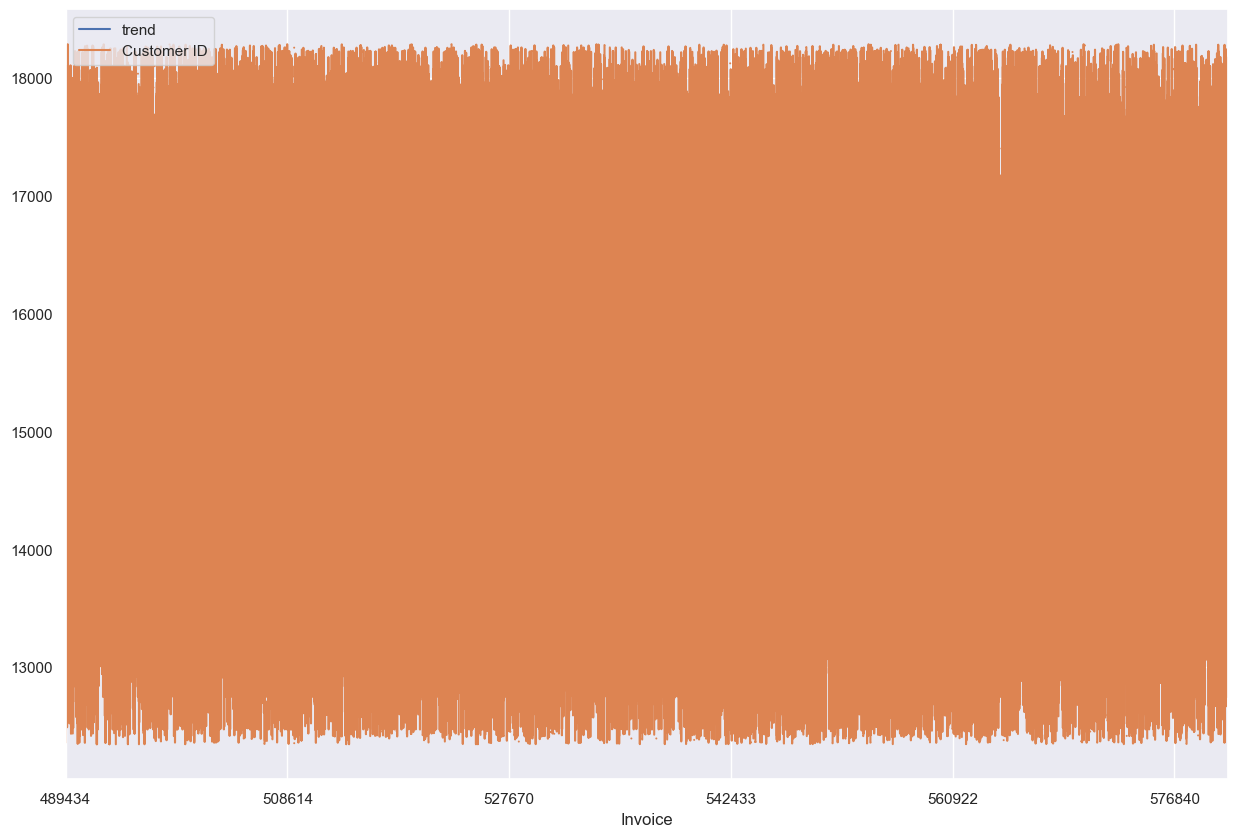

In [106]:
df[['trend','Customer ID']].plot(figsize=(15,10)).autoscale(axis='x',tight=True);

## Outliers

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.rcParams['figure.figsize']=[8,6]
sns.set_style('darkgrid')
df_data= pd.read_csv("C:/Users/30071747/Downloads/online_gift_ware_MI.csv")
df_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,01/12/2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12.0,01/12/2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,01/12/2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,01/12/2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,01/12/2009 07:45,1.25,13085.0,United Kingdom


<AxesSubplot:ylabel='Quantity'>

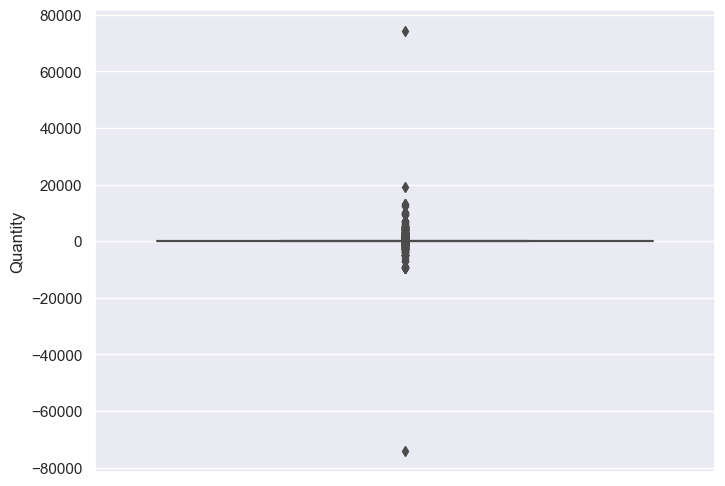

In [108]:
sns.boxplot(y='Quantity',data=df_data)